In [1]:
import glob
import pandas as pd
import datetime
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
data = pd.concat([pd.read_csv(f) for f in glob.glob('raw_data/*.csv')], ignore_index = True)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,24.660000,25.190001,24.660000,24.850000,21.798594,26795000
1,2010-01-05,24.719999,24.850000,24.350000,24.820000,21.772274,28669900
2,2010-01-06,24.770000,24.920000,24.379999,24.459999,21.456474,24560700
3,2010-01-07,24.459999,24.610001,24.080000,24.379999,21.386301,30469700
4,2010-01-08,24.280001,24.750000,24.250000,24.680000,21.649469,23542400


In [4]:
# Check data types in columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
Date         2515 non-null object
Open         2515 non-null float64
High         2515 non-null float64
Low          2515 non-null float64
Close        2515 non-null float64
Adj Close    2515 non-null float64
Volume       2515 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.6+ KB


In [5]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,38.868362,39.208131,38.552779,38.884314,36.359072,2.014207e+07
std,8.806275,8.845207,8.779054,8.806248,9.533124,1.312130e+07
min,21.459999,21.680000,21.240000,21.459999,18.899055,3.331700e+06
25%,31.990000,32.270000,31.714999,32.014999,28.647736,1.194820e+07
50%,38.930000,39.209999,38.619999,38.959999,36.420536,1.665660e+07
75%,45.405001,45.774999,45.100001,45.419998,43.528221,2.452330e+07
max,60.180000,60.500000,59.750000,60.150002,59.377201,1.835039e+08


In [6]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])



In [8]:
df.head()

,Date,Close
0,2010-01-04,24.850000
1,2010-01-05,24.820000
2,2010-01-06,24.459999
3,2010-01-07,24.379999
4,2010-01-08,24.680000


In [9]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 2 columns):
Date     2515 non-null object
Close    2515 non-null float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [10]:
# Check for missing values in the columns
df.isna().values.any()

False

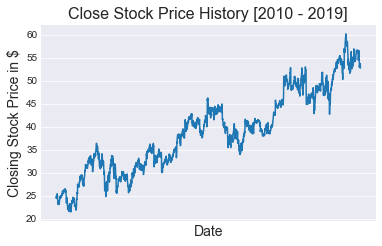

In [11]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

from datetime import datetime

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2010 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()



# Save the figure
plt.savefig("CloseStockPriceHistory.png")


# Show plot
plt.show()

In [12]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [13]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [14]:
# Import package for linear model
from sklearn.linear_model import LinearRegression


In [15]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [16]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.011379250327539675
Intercept:  24.622199827278653


C:\Users\melat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


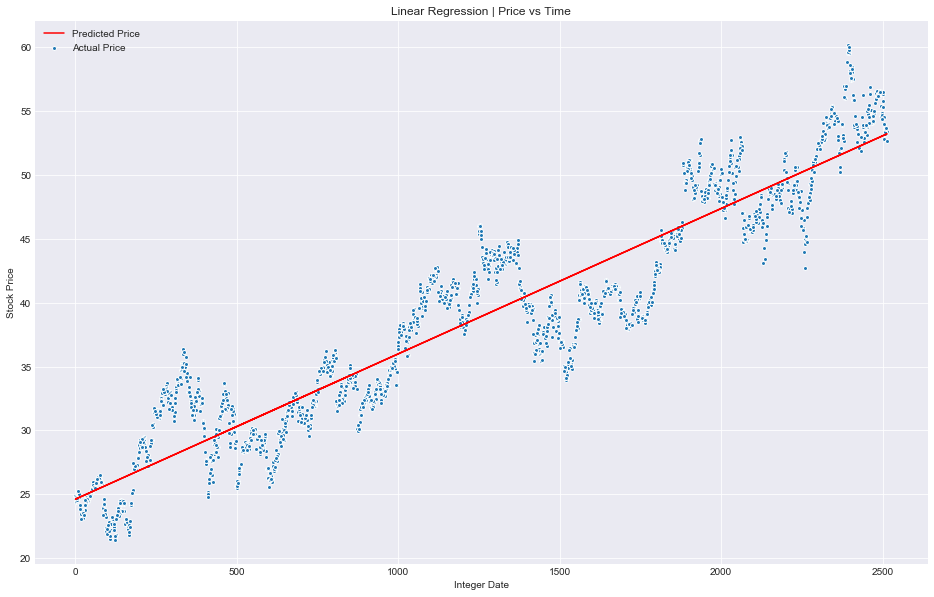

In [18]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()

# Save the figure
plt.savefig("TrainSetGraph.png")
plt.show()

In [19]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [20]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [21]:
# Get number of rows in data set for random sample
df.shape

(2515, 2)

In [22]:
# Generate 25 random numbers
randints = np.random.randint(2515, size=25)

df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
# Select row numbers == random numbers


df_sample = df[df.index.isin(randints)]





In [23]:
df_sample.head()

,Date,Close,Prediction
83,2010-05-04,24.969999,25.566678
153,2010-08-12,22.940001,26.363225
215,2010-11-09,28.740000,27.068739
227,2010-11-26,27.490000,27.205290
502,2011-12-29,25.799999,30.334583


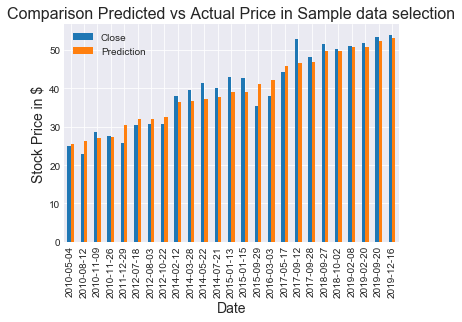

In [24]:
## Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)


# Save the figure
plt.savefig("ComparisonPredictedActualPrice.png")

# Show plot
plt.show()

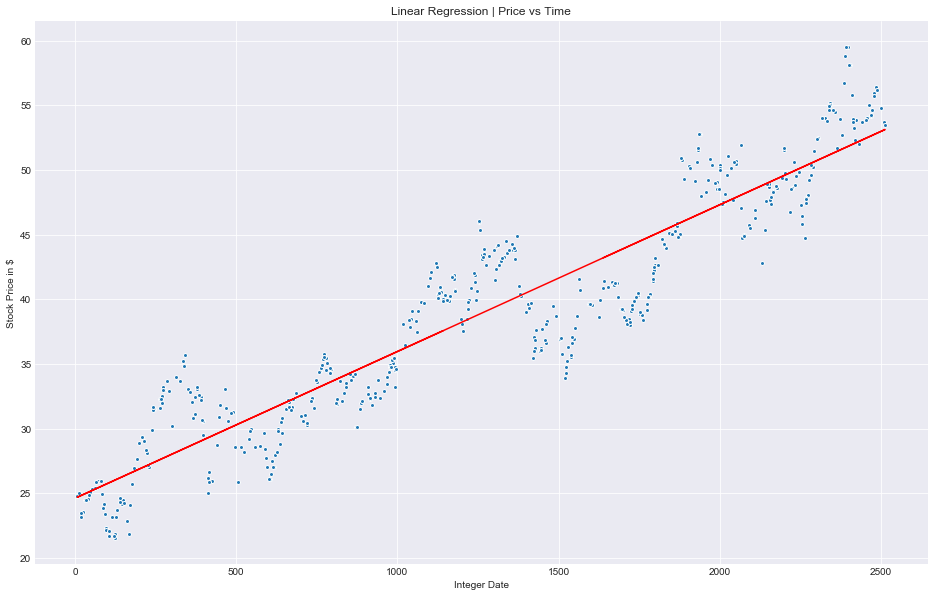

In [29]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')


# Save the figure
plt.savefig("LinearRegressionPriceVsTime.png")

plt.show()

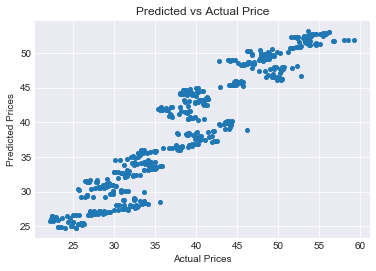

In [25]:
# Plot predicted vs actual prices

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')


# Save the figure
plt.savefig("PredictedVsActual.png")

plt.show()

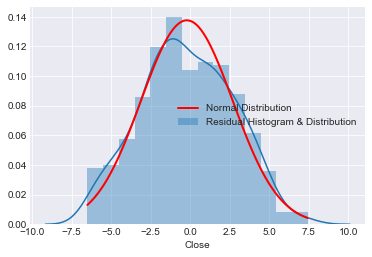

In [26]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()


# Save the figure
plt.savefig("ResidualHistogramNormalDistribution.png")
plt.show()

In [27]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [28]:
df.head()

,Date,Close,Prediction
0,2010-01-04,24.850000,24.622200
1,2010-01-05,24.820000,24.633579
2,2010-01-06,24.459999,24.644958
3,2010-01-07,24.379999,24.656338
4,2010-01-08,24.680000,24.667717


In [29]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [30]:
# Statistical summary of test data
df['Close'].describe()

count    2515.000000
mean       38.884314
std         8.806248
min        21.459999
25%        32.014999
50%        38.959999
75%        45.419998
max        60.150002
Name: Close, dtype: float64

In [31]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4016192685786297
Mean Squared Error: 8.454557786679763
Root Mean Squared Error: 2.9076722282058824


In [32]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.8954510739798828


In [33]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.8959861627913949

In [34]:
# Export to csv

df.to_csv("clean_data/Oracle_data.csv")